# 12. Плитки невронски мрежи

Со употребата на само еден неврон моделот за машинско учење може да реши само линеарни проблеми.
Со други зборови кога излезната функција е линеарна, односно станува збор за линеарна регресија, невронот може само да апроксимира права линија, односно рамнина во просторот на влезните обележја.

Ако пак го користиме за класификација, како што тоа беше случај во претходното поглавје, невронот може да разграничи помеѓу класите во податочното множество само со употреба на права линија во 2Д, односно рамнина во случај на обележја со повеќе од 2 димензии. 

Така, со еден неврон не можат да се дојде до решение на **нелинеарни проблеми**, какви што вообичаено се среќаваат во пракса.
За таа цел, речиси секогаш софтверските неврони се користат во архитектури во кои повеќе неврони се поврзани помеѓу себе.
Овие структури ги нарекуваме **невронски мрежи**.

## 12.0. Градба на плитките невронски мрежи

Во наједноставниот случај, невронските мрежи имаат еден **скриен слој** и еден **излезен слој** на неврони, како што е прикажано на сликата.
Ваквите модели се нарекуваат **плитки невронски мрежи**.

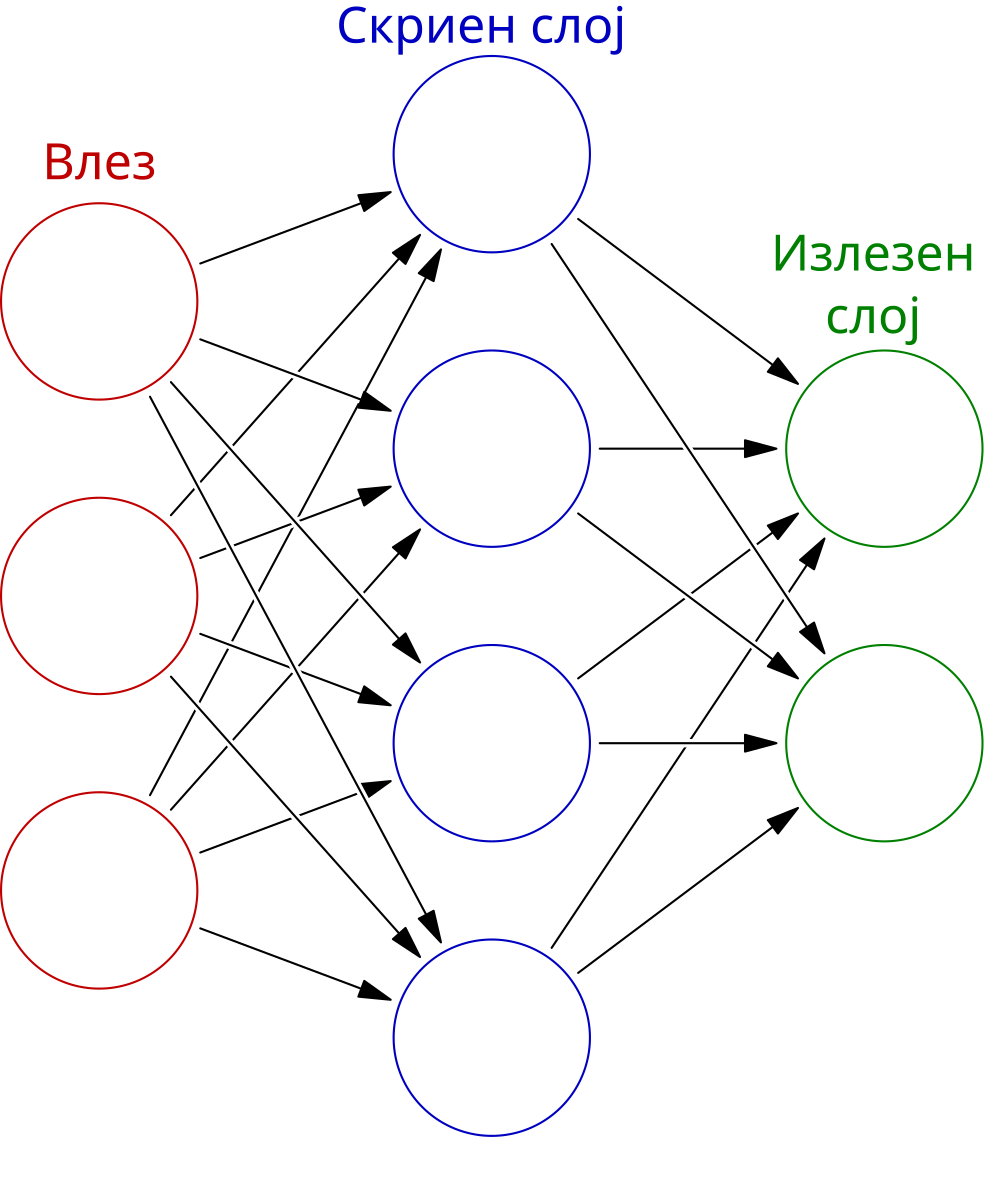

**Слика 1** Плитка невронска мрежа со еден скриен слој составен од четири неврони (сино), и еден излезен слој составен од 2 неврони (зелено). Влезните податоци вообичаено се цртаат како влезен слој (црвено).

* Модифицирано од Glosser.ca - Own work, Derivative of File:Artificial neural network.svg, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=24913461


Како што може да се види на сликата, секој неврон од скриениот слој е поврзан со секој од коефициентите на влезниот вектор $\mathbf{x}$.
Секој неврон од излезниот слој пак е поврзан со секој неврон од скриениот слој.

Поради ова поврзување, овој вид на слоеви се нарекуваат и **целосно поврзани** односно **густи** (анг. *fully connected* и *dense*).
Оваа едноставна архитектура сепак им овозможува на плитките невронски мрежи да моделираат било која нелинеарна функција, па тие се уште познати и како **универзални апроксиматори**.

Излезот на една плитка невронска мрежа за даден влезен вектор на податоци $\mathbf{x}$ може да ја пресметаме преку:

$$
    \mathbf{y}_h = f_h(\mathbf{a}_h) = f_h(\mathbf{W}_h \mathbf{x}^T + \mathbf{b}_h) \, , \\
    \mathbf{y} = f_o(\mathbf{a}_o) = f_o(\mathbf{W}_o \mathbf{y}_h + \mathbf{b}_o)  \\
    \mathbf{y} = f_o(\mathbf{W}_o \cdot f_h(\mathbf{W}_h \mathbf{x}^T + \mathbf{b}_h) + \mathbf{b}_o) \, ,
$$

каде со $_h$ се означени параметрите и излезите добиени од скриениот слој, а со $_o$ оние од излезниот слој.
Овојпат, бидејќи во секој слој може да имаме повеќе неврони, нивните тежини се распоредени долж редиците на матриците за тежини $\mathbf{W}$ а нивните коефициенти на поместување во векторите колони $\mathbf{b}$.

На тој начин, излезот на мрежата се добива со процесирање на влезните податоци слој по слој се додека не се дојде до излезниот слој на мрежата.
Овој процес се нарекува **пропагација нанапред** (анг. *forward pass* или *feed forward*).

* Длабоките невронски мрежи имаат повеќе скриени слоеви, тие ги разгледуваме во следното поглавје.

Ако пак на влез се донесат низа на $N$ примероци од влезните податоци $\mathbf{x}_n$ добиваме:

$$
    \mathbf{Y}_h = f_h(\mathbf{A}_h) = f_h(\mathbf{W}_h \mathbf{X}^T + \mathbf{b}_h) \, , \\
    \mathbf{Y} = f_o(\mathbf{A}_o) = f_o(\mathbf{W}_o \mathbf{Y}_h + \mathbf{b}_o) \\
    \mathbf{Y} = f_o(\mathbf{W}_o \cdot f_h(\mathbf{W}_h \mathbf{X}^T + \mathbf{b}_h) + \mathbf{b}_o) \, .
$$

## 12.1. Излезни нелинеарности

За да може да се употреби алгоритамот за спуштање по градиентот (ГД) за тренирање на невронски мрежи, мора сите излезни нелинеарности на невроните во мрежата, како и функцијата на грешка, да бидат диференцијабилни.
Инаку не би можел да се пресмета градиентот за секој од параметрите на секој од невроните во мрежата.

Ова е причината зошто не може да се употреби неконтинуирана излезна функција како пресекување на активацијата со остар праг:
$$
  y = f(a) = \begin{cases}
    1 & \mbox{ако } a > 0,5 \\
    0 & \mbox{поинаку}
    \end{cases} \, .
$$

За таа цел во употреба се неколку континуирани (диференцијабилни) функции.
Во рамките на една невронска мрежа, излезните нелинеарности на невроните во скриените и излезните слоеви вообичаено се разликуваат, па ќе ги разгледаме одвоено.


### Излезни нелинеарности во скриените слоеви

Типичен избор за нелинеарности во скриениот слој се:

  - **сигмоида** - со излез во опсег 0 - 1

$$
\sigma(a) = \frac{1}{1+e^{-a}}
$$

  - **тангенс хиперболикум** - со излез во опсег од -1 до 1, и
   
$$
\tanh(a) = \frac{e^{2a} - 1}{e^{2a} + 1}
$$ 

  - **полубранов насочувач** 
$$
ReLU(a) = \begin{cases}
    a & \mbox{ако } a > 0 \\
    0 & \mbox{поинаку}
\end{cases}
$$ 

Полубрановиот насочувач има низа на предности меѓу кои: поедноставна пресметка на излезот на невроните, подобра пропагација на градиентот во процесот на тренирање, како и реткоста на активација на невроните -- при случајна иницијализација на тежините половина од невроните ќе дадат 0.
Поради тоа, таа често се применува во скриените слоеви на невронските мрежи.
Уште една мотивација за употреба на оваа нелинеарност е асиметријата во однос на $y$-оската која е аналогна на начинот на работа на биолошките неврони.

Да ги прикажеме овие излезни нелинеарности со Пајтон.

Text(0, 0.5, 'Neuron Output')

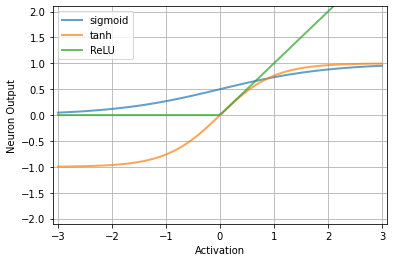

In [1]:
import numpy as np
from matplotlib import pyplot as plt

a = np.linspace(-3, 3, 100)
y_sigmoid = 1 / (1 + np.exp(-a))
y_tanh = (np.exp(2 * a) - 1) / (np.exp(2 * a) + 1)
y_relu = a.copy() 
y_relu[a < 0] = 0 
plt.plot(a, y_sigmoid, lw=2, alpha=0.7)
plt.plot(a, y_tanh, lw=2, alpha=0.7)
plt.plot(a, y_relu, lw=2, alpha=0.7)
plt.axis([-3.1, 3.1, -2.1, 2.1])
plt.grid(True)
plt.legend(["sigmoid", "tanh", "ReLU"])
plt.xlabel("Activation")
plt.ylabel("Neuron Output")

### Излезни нелинеарности во излезниот слој

За невроните во излезниот слој вообичаено се користат:

  - **сигмоида** - за класификација,
  - **софтмакс** - за класификација со повеќе излезни класи $J$: 

$$
f(a_j) = \frac{e^{a_j}}{\sum_{j=0}^{J-1} e^{a_j}} \,  ,
$$ 
каде $a_j$ е активацијата на невронот кој соодветствува на класата $j$; софтмакс функцијата го нормализира збирот на излезот на сите излезни неврони, па може да се каже дека ни дава апроксимација на веројатноста на секоја од класите $f(a_j) \approx P(y = j \mid \mathbf{a})$,

  - **линеарна** - кај моделите за регресија

$$
f(a) = a
$$

## 12.2. Функција на загуба

Изборот на нелинеарноста во излезниот слој ќе влијае врз изборот на функцијата на загуба на мрежата.
Некои функции на загуба имаат поповолни својства за некои излезни нелинеарности наспроти други.

Денес најчесто се употребуваат следните функции за грешка:

  - **средна квадратна грешка** - основна функција на грешка за регресија и бинарна класификација,

$$
MSE = \frac{1}{N} \sum_{n=0}^{N-1} (y - \tilde{y})^2
$$ 

  - **меѓу-ентропија** - кај модели за класификација со излезна нелинеарност сигмоида нејзиниот извод има подобри карактеристики,

$$
CE = - \frac{1}{N} \sum_{n=0}^{N-1} y \ln \tilde{y} + (1-y) \ln(1-\tilde{y})
$$ 
  - **логаритамска веројатност** (анг. *log-likelihood*) - кај моделите со софтмакс функција на излез.

$$
LL = - \ln \tilde{y} 
$$ 

## 12.3. Тренирање на плитките невронски мрежи

Како што кажавме во претходното поглавје, невронските мрежи најчесто се тренираат со употреба на алгоритамот за **спуштање по градиентот (ГД)**.

### Пресметка на градиентот

За разлика од моделите составени од еден неврон, кај плитките и длабоките невронски мрежи, пресметувањето на градиентот за нагодување на параметрите $\theta$ започнува со пресметка на градиентите за излезниот слој, па за скриениот слој.
Поради тоа, овој процес се нарекува **пропагација наназад** (анг. *backpropagation*).

* Ова беше причината заради која функцијата за пресметка на градиентите ја нарековме `backprop()` во имплементацијата на тренирањето во претходното поглавје.

* Процесот на пропагација на градиентот наназад е поизразен кај длабоките невронски мрежи кои имаат повеќе длабоки слоеви.

Притоа, за пресметување на парцијалниот извод се користи правилото за пресметување на **извод на сложена функција**, односно:
$$
  \frac{\partial \mathcal{L}}{\partial \theta_l} =
  \frac{\partial \mathcal{L}}{\partial \tilde{y}}
  \cdot \frac{\partial \tilde{y}}{\partial y_{L-2}}
  \, \cdots \, \frac{\partial y_{l+1}}{\partial \theta_{l+1}}
  \cdot \frac{\partial y_{l}}{\partial \theta_{l}}
  \, ,
$$

каде $y_l$ е излезот на $l$-от слој на мрежата, а $L$ е вкупниот број на слоеви.

### Поделба на множеството за тренирање на купчиња

При тренирањето на невронски мрежи, поради тоа што вообичаено се работи со големи множества на влезни податоци, станува неисплатливо градиентот да се пресметува за сите влезни примероци.

Другиот екстрем е оптимизацијата на параметрите на мрежата да се прави со градиентот пресметан за секој од примероците од множество за тренирање земен по случаен избор.
Оваа варијанта на алгоритамот се нарекува **стохастично спуштање по градиентот** (анг. *stochastic gradient descent (SGD)*).
Притоа, изминувањето на целото множество за тренирање се нарекува и **епоха**.
Случајниот избор на влезните примероци технички се изведува преку случајно мешање на датасетот пред секоја епоха, по што следи секвенцијално земање на примероците.

Сепак, пресметката на градиентот по примерок не дава добра естимацијата на вистинскиот градиент на функцијата на грешка.
Поради тоа, најчесто се употребува компромисно решение во кое се зема подмножество, или **купче** (анг. *batch* или *mini-batch*) примероци од множеството за тренирање по случаен избор, и се врши адаптација на параметрите за пресметаниот градиент.
Оваа верзија на ГД алгоритамот се нарекува **спуштање по градиентот со купчиња** (анг. *batch gradient descent (BGD)* и *mini batch gradient descent (MBGD)*).

* Технички постои разлика помеѓу МБГД и БГД - кај МБГД се врши апдејтирање на параметрите за секое купче, додека кај БГД тоа се прави по поминување низ целото множество за тренирање.

Скоро секогаш за тренирање на невронските мрежи, а и други алгоритми за машинско учење, се употребува МБГД алгоритамот но под името СГД.

### Прилагодување на чекорот на учење

При употреба на СГД, чекорот на учење е еден од најважните параметри во тренирањето на невронските мрежи.
Ако е преголем оптимизацијата може да го натфрли минимумот на функцијата на грешка, додека пак, ако е премал, на алгоритамот ќе му бидат потребни многу итерации за да заврши тренирањето.




**Слика 2.** Илустрација на влијанието на чекорот на учење врз процесот на тренирање: кога чекорот е голем, мрежата брзо ќе се движи кон минимумот на функцијата на загуба, но нема да може да го достигне; кога чекорот е мал, мрежата ќе може да го достигне минимумот, но за тренирање ќе се потребни поголем број на итерации.

За да се унапреди процесот на учење вообичаено се употребуваат **стратегии на промена** на чекорот на учење (анг. *learning rate scheduling*).

Една едноставна, а често употребувана, стратегија е на почетокот од тренирањето, кога мрежата не „знае“ ништо за проблемот, да се земе голем чекор на учење, со цел побрзо да напредува учењето.
Потоа, овој иницијално голем чекор, постепено се намалува за време на тренирањето, со цел тоа да конвергира поблиску до минимумот на функцијата на загуба.

Постојат и понапредни алгоритми, каков што е **Адам**, кој најчесто се користи при тренирањето на невронските мрежи. Тој ги зема предвид првиот и вториот момент, односно брзината и забрзувањето на промената на градиентот во однос на претходните итерации за адаптација на чекорот на учење.

Еден голем проблем при тренирањето на невронските мрежи е можноста процесот да заглави во локален минимум, по цена на промашување на глобалниот минимум.
Ова е поизразено кај помалите невронски мрежи.
Овој проблем може да се реши преку реиницијализација на чекорот на учење на почетната голема вредност по одреден број на итерации.

## 12.4. Регуларизација на невронските мрежи

При тренирање на невронските мрежи постои опасност од **пренагодување** на параметрите на невронската мрежа.
Тоа се случува кога мрежата станува премногу прилагодена на множеството за тренирање, а за сметка на тоа ѝ опаѓаат перформансите за множеството за тренирање. 
Бидејќи во овој случај, параметрите на мрежата добиваат изразено високи вредности, често во функцијата на загуба се вклучува дел кој ќе го казни овој пораст.
Овој процес се нарекува **регуларизација**.

Најчесто регуларизацијата се прави со внесување на $L^2$ нормата на параметрите на моделот $\theta$ во функцијата на загуба.
На пример, при употреба на средната квадратна грешка, би имале:

$$
  L(y, \tilde{y}, \theta) =    L(y, \tilde{y}) + \lambda \sum_{l=0}^{L-1} (\mathbf{W}_l^T \mathbf{W}_l + \mathbf{b}_l^T \mathbf{b}_l) \, ,
$$

каде $\lambda$ e **коефициентот на регуларизација**, а со $\mathbf{W}_l^T \mathbf{W}_l$ и $\mathbf{b}_l^T \mathbf{b}_l$ се добиваат сумите од квадратите за сите параметри на невроните од слојот $l$.

## 12.3. Регресија со плитка невронска мрежа

Да направиме една невронска мрежа која ќе треба да го предвидува излезот на една синусна функција за влезни податоци кои не се дел од множеството за тренирање.
За работа со невронски мрежи ќе се послужиме со пакетот `scikit-learn`.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neural_network

Најпрвин да го создадеме множеството за тренирање. 
Ќе земеме 10 вредности во интервал од 0 до 2$\pi$ на еднакво растојание и за нив ќе ја пресметаме вредноста на синусот.
Дополнително на синусната функција ќе ѝ додадеме бел шум.

In [3]:
xs = np.linspace(0, 2 * np.pi, 10)
np.random.seed(42)
ys = np.sin(xs) + np.random.normal(size=xs.size) * 0.2

Да го прикажеме добиеното множество за тренирање и синусната функција која ќе ни претставува целна функција која сакаме да ја научиме.

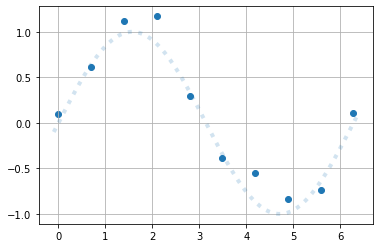

In [4]:
x_axis = np.linspace(-.1, 2 * np.pi + .1, 100)
y_sin = np.sin(x_axis)

xs = np.expand_dims(xs, 1)
x_axis = np.expand_dims(x_axis, 1)

plt.figure()
plt.scatter(xs, ys)
plt.plot(x_axis, y_sin, ':', lw=4, alpha=0.2)
plt.grid()

Да ја иницијализираме невронската мрежа со класата `MLPRegressor` која ќе создаде невронска мрежа со линеарна излезна функција на невронот во излезниот слој. 

In [5]:
reg = neural_network.MLPRegressor(
    hidden_layer_sizes=(5),
    activation="tanh",
    solver="adam",
    alpha=0.0001,
    batch_size="auto",
    learning_rate_init=0.01,
    max_iter=50,
    tol=1e-4,
    early_stopping=False,
    random_state=42,
    verbose=True,    
    )

Со влезните параметри ги дефинираме следните големини:
- `hidden_layer_sizes` - број на неврони во скриениот слој на мрежата,
- `activation` - избор на излезна нелинеарност на невроните во скриениот слој на мрежата,
- `solver` - избор на алгоритам за учење 
- `alpha` - коефициент на $L^2$ регуларизација, кој погоре го означивме со $\lambda$,
- `batch_size` - големина на купчињата,
- `learning_rate_init` - почетна вредност на чекорот на учење
- `max_iter` - максимален број на епохи на тренирање на мрежата, 
- `tol` - ако загубата се менува помалку од овој праг на толеранција во рамките на 10 епохи тренирањето ќе биде запрено и покрај тоа што не е достигнат максималниот број на епохи,
- `early_stopping` - параметар со кој се овозможува рано запирање на тренирањето ако започнат да растат загубите пресметани на подмножеството за валидација, кое автоматски се одвојува од множеството за тренирање по случаен избор,
- `random_state` - поставување на генераторот на случајни броеви со цел да се добијат исти параметри на мрежата при нејзината случајна иницијализација,
- `verbose` - ниво на детали испишани во процесот на тренирање на мрежата

За да ги видиме сите достапни поставки за невронската мрежа, како и повеќе детали за секоја од нив може да напишеме:

In [6]:
neural_network.MLPRegressor?

Init signature:
neural_network.MLPRegressor(
    hidden_layer_sizes=(100,),
    activation='relu',
    *,
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=False,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
    max_fun=15000,
)
Docstring:     
Multi-layer Perceptron regressor.

This model optimizes the squared error using LBFGS or stochastic gradient
descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden l

Откако сме ја иницијализирале мрежата можеме да ја истренираме со следната наредба:

In [7]:
reg.fit(xs, ys)

Iteration 1, loss = 1.79730213
Iteration 2, loss = 1.69205954
Iteration 3, loss = 1.59169986
Iteration 4, loss = 1.49621502
Iteration 5, loss = 1.40556850
Iteration 6, loss = 1.31969700
Iteration 7, loss = 1.23851098
Iteration 8, loss = 1.16189426
Iteration 9, loss = 1.08970298
Iteration 10, loss = 1.02176477
Iteration 11, loss = 0.95787993
Iteration 12, loss = 0.89782678
Iteration 13, loss = 0.84137310
Iteration 14, loss = 0.78829203
Iteration 15, loss = 0.73837773
Iteration 16, loss = 0.69145581
Iteration 17, loss = 0.64738671
Iteration 18, loss = 0.60606433
Iteration 19, loss = 0.56741246
Iteration 20, loss = 0.53138080
Iteration 21, loss = 0.49794070
Iteration 22, loss = 0.46707996
Iteration 23, loss = 0.43879543
Iteration 24, loss = 0.41308237
Iteration 25, loss = 0.38992005
Iteration 26, loss = 0.36925447
Iteration 27, loss = 0.35098048
Iteration 28, loss = 0.33492811
Iteration 29, loss = 0.32085881
Iteration 30, loss = 0.30847557
Iteration 31, loss = 0.29744608
Iteration 32, los

/home/vibe/miniconda3/envs/work/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='tanh', hidden_layer_sizes=5, learning_rate_init=0.01,
             max_iter=50, random_state=42, verbose=True)

Од исписот може да видиме дека тренирањето не конвергирало, односно загубата сеуште опаѓала пред прекинот кој дошол поради поставката за максимален број на епохи. Со други зборови нашата мрежа е **недоволно нагодена** (анг. *under fitting*).

Тренираната мрежа можеме да ја искористиме за предвидување на вредности на научената функција:

In [8]:
y_pred_under = reg.predict(x_axis)

И да ги прикажеме резултатите.

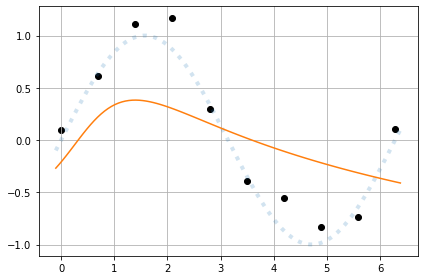

In [9]:
# %% plot results
plt.figure()
plt.scatter(xs, ys, c='k')
plt.plot(x_axis, y_sin, ':', lw=4, alpha=0.2)
plt.plot(x_axis, y_pred_under)
plt.grid()
plt.tight_layout()

Може да видиме дека мрежата релативно добро ги опишала точките од множеството за тренирање, но не ја научила целната функција. 

За да ја дотренираме мрежата ќе ја иницијализираме со нови параметри и повторно ќе ја извршиме функцијата за тренирање.

In [10]:
reg = neural_network.MLPRegressor(
    hidden_layer_sizes=(5),
    activation="tanh",
    alpha=0.0001,
    learning_rate_init=0.01,
    max_iter=500,
    tol=1e-4,
    random_state=42,
    )
reg.fit(xs, ys)

MLPRegressor(activation='tanh', hidden_layer_sizes=5, learning_rate_init=0.01,
             max_iter=500, random_state=42)

Може да видиме дека сега тренирањето конвергирало. Да ги прикажеме резултатите.

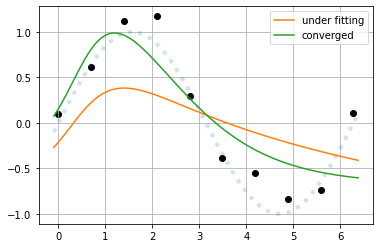

In [11]:
y_pred = reg.predict(x_axis)

plt.figure()
plt.scatter(xs, ys, c='k')
plt.plot(x_axis, y_sin, ':', lw=4, alpha=0.2)
plt.plot(x_axis, y_pred_under, label="under fitting")
plt.plot(x_axis, y_pred, label="converged")
plt.grid()
plt.legend()

Може да видиме дека по конвергирањето мрежата повеќе се доближила до целната функција.

Да ги прикажеме параметрите на тренираната мрежа:

In [12]:
print("loss", reg.loss_)  # последната вредност на загубата
print("epochs", reg.n_iter_)  # бројот на епохи во тренирањето
print("weights", reg.coefs_)  # тежини на невроните во мрежата
print("biases", reg.intercepts_)  # коефициенти за поместување на невроните во мрежата

loss 0.05925160789377685
epochs 274
weights [array([[ 0.45417082,  1.30731649,  0.57117395,  0.35249836, -1.01839051]]), array([[-0.82887394],
       [ 0.79547048],
       [ 0.51462409],
       [-0.86270602],
       [-0.46653341]])]
biases [array([-0.92192804, -0.58288423,  1.25031575, -0.38712043,  0.04991098]), array([-0.7600417])]


Може да видиме дека тренирањето завршило за 274 епохи, а последната вредност на загубата била 0,059. Ова е помало од последната загуба кога го прекинавме тренирањето на 50та епоха (0,14). 

Да ја исцртаме и промената на загубата во текот на тренирањето.

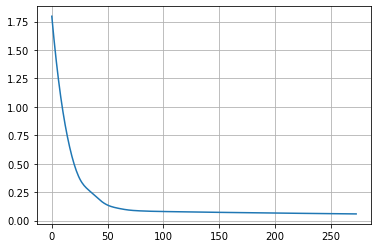

In [13]:
plt.plot(reg.loss_curve_)
plt.grid()

Веќе видовме какво влијание на процесот на тренирање имаше промената на еден од хипер-параметрите (максималниот број на епохи).

Ајде да направиме неколку експерименти за да видиме како влијаат останатите хипер-параметри врз перформансите на добиената мрежа.

### Експеримент 1. Промена на бројот на неврони

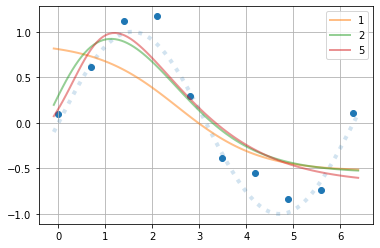

In [14]:
plt.figure()
plt.scatter(xs, ys)
plt.plot(x_axis, y_sin, ':', lw=4, alpha=0.2)
plt.grid()
for neurons in [1, 2, 5]:
    reg = neural_network.MLPRegressor(
        hidden_layer_sizes=neurons,
        activation="tanh",
        alpha=0.0001,
        learning_rate_init=0.01,
        max_iter=500,
        tol=1e-4,
        random_state=42,
        )
    reg.fit(xs, ys)
    y_preds = reg.predict(x_axis)
    plt.plot(x_axis, y_preds, lw=2, alpha=0.5, label=neurons)

plt.legend()

Може да видиме дека со 1 неврон во скриениот слој на излез од мрежата ја добиваме функцијата на неговата излезна нелинеарност `tanh`. Веќе со 2 неврони мрежата може да научи функција приближна на целната. Ова ја илустрира потребата моќта на моделот да биде соодветна на проблемот кој сакаме да го решиме.

### Експеримент 2. Промена на чекорот на учење

/home/vibe/miniconda3/envs/work/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


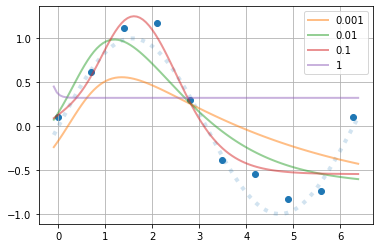

In [15]:
# %% try different learning rates
plt.figure()
plt.scatter(xs, ys)
plt.plot(x_axis, y_sin, ':', lw=4, alpha=0.2)
plt.grid()
for learn in [0.001, 0.01, 0.1, 1]:
    reg = neural_network.MLPRegressor(
        hidden_layer_sizes=(5),
        activation="tanh",
        alpha=0.0001,
        learning_rate_init=learn,
        max_iter=500,
        tol=1e-4,
        random_state=42,
        )
    reg.fit(xs, ys)
    y_preds = reg.predict(x_axis)
    plt.plot(x_axis, y_preds, lw=2, alpha=0.5, label=learn)

plt.legend()

На графиконот јасно се гледа влијанието на чекорот на учење врз процесот на тренирање. За многу големи вредности (1) може да видиме дека тренирањето сосема потфрлило. Подобри резултати имаме за вредности од 0,1 и 0,01. За мали вредности (0,001) може да видиме дека тренирањето не конвергирало во рамките на истиот број на епохи како за поголемите вредности.

### Експеримент 3. Промена на почетната точка на тренирањето

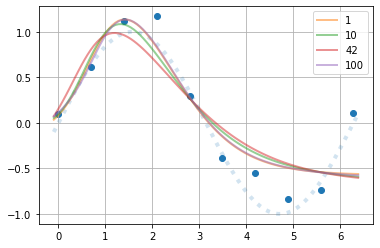

In [16]:
# %% try different starting points
plt.figure()
plt.scatter(xs, ys)
plt.plot(x_axis, y_sin, ':', lw=4, alpha=0.2)
plt.grid()
for seed in [1, 10, 42, 100]:
    reg = neural_network.MLPRegressor(
        hidden_layer_sizes=(5),
        activation="tanh",
        alpha=0.0001,
        learning_rate_init=0.01,
        max_iter=500,
        tol=1e-4,
        random_state=seed,
        )
    reg.fit(xs, ys)
    y_preds = reg.predict(x_axis)
    plt.plot(x_axis, y_preds, lw=2, alpha=0.5, label=seed)

plt.legend()

Може да видиме дека почетната точка влијание врз резултатот на процесот на тренирање.

### Експеримент 4. Регуларизација

За да ја илустрираме потребата од регуларизација на мрежата, да пробаме што ќе се случи ако ја намалиме толеранцијата за запирање и го зголемиме максималниот број на епохи. 

In [17]:
reg = neural_network.MLPRegressor(
    hidden_layer_sizes=(5),
    activation="tanh",
    alpha=0.0001,
    learning_rate_init=0.01,
    max_iter=5000,
    tol=1e-9,
    random_state=42,
    )
reg.fit(xs, ys)

MLPRegressor(activation='tanh', hidden_layer_sizes=5, learning_rate_init=0.01,
             max_iter=5000, random_state=42, tol=1e-09)

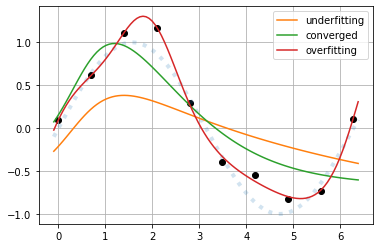

In [18]:
y_pred_over = reg.predict(x_axis)

plt.figure()
plt.scatter(xs, ys, c='k')
plt.plot(x_axis, y_sin, ':', lw=4, alpha=0.2)
plt.plot(x_axis, y_pred_under, label="underfitting")
plt.plot(x_axis, y_pred, label="converged")
plt.plot(x_axis, y_pred_over, label="overfitting")
plt.grid()
plt.legend()

Може да видиме дека мрежата совршено го научила множеството за тренирање. Ова се нарекува **пренагодување** (анг. *overfitting*). Ова е секако непожелен резултат, затоа што сакаме мрежата да може добро да работи за податоци кои не се дел од множеството за тренирање.

Може да заклучиме дека повисоката вредност на `tol` го прекинувала тренирањето пред параметрите на мрежата да бидат пренагодени.

Ајде да видиме какво влијание ќе има регуларизацијата врз процесот на тренирањето.

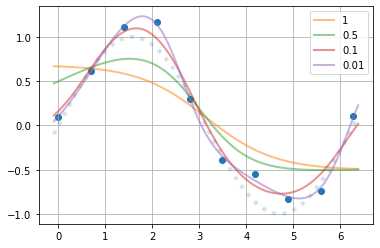

In [19]:
# %% tweak regularisation
plt.figure()
plt.scatter(xs, ys)
plt.plot(x_axis, y_sin, ':', lw=4, alpha=0.2)
plt.grid()
for alpha in [1, 0.5, 0.1, 0.01]:
    reg = neural_network.MLPRegressor(
        hidden_layer_sizes=(5),
        activation="tanh",
        alpha=alpha,
        learning_rate_init=0.01,
        max_iter=10000,
        tol=1e-9,
        random_state=42,
        )
    reg.fit(xs, ys)
    y_preds = reg.predict(x_axis)
    plt.plot(x_axis, y_preds, lw=2, alpha=0.5, label=alpha)

plt.legend()

Можеме да го видиме ефектот на пресилната регуларизација. Во случајот кога $\lambda$ е 1 мрежата воопшто не учи од множеството за тренирање. За премали вредности (0,01) мрежата повторно е пренагодена. За вредност од 0,1 добиваме најдобри резултати не само во овој експеримент, туку и за севкупно за сите експерименти до сега.